# Pérez Angeles Adrián

In [1]:
from pylab import* 
from scipy.constants import k
from math import *

Presión barométrica La presión barométrica $p$ a una determinada altura $h$, esta
descrita por la siguiente ecuación diferencial.
$$\frac{dP}{dh}=\frac{-mg}{Tk_{B}}P$$
Donde $m$ es la masa de una molécula, $g$ es el valor de la gravedad, $k_{B}$ la constante de
Boltzmann, y $T$ el valor de la temperatura.

(i) Investiga la altura $h$ sobre el nivel del mar de la Ciudad de México y del pico
de Orizaba. Hecho esto calcula la variación barométrica resolviendo la EDO con el
método de tu preferencia. Considera $P_{0} = 1$, $k_{B} = 1$, $m = 1$, y $T = 25^{\circ}C$. Realiza en
una gráfica $h$ vs $P$, las variaciones de la presión de la CDMX y del pico de Orizaba,
donde la altura estará comprendida entre $h = 0$ y $h_{max}$ de cada lugar.

La altura de la cdmx es de $h_{cdmx}=2,250 m$  y de el pico de orizaba es de $h_{picoorizaba}=5,636 m$

(ii) Para la Ciudad de México vuelve a calcular la presión final (el ultimo valor de presión al resolver la EDO) si ahora la temperatura varia en un intervalo $T = [0^{\circ},35^{\circ} C]$ con 200 valores. Gráfica la temperatura vs la presión final.

Para analizar mejor las gráficas usa escala logarítmica en ambos ejes. Comenta los resultados con tus propias palabras.

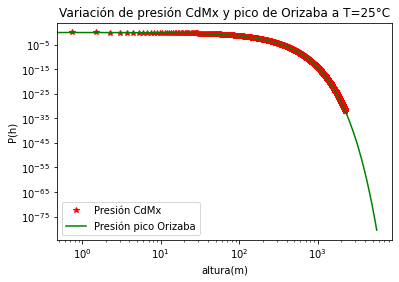

In [75]:
#1)
# usando Runge-Kutta 4
def RK_4(f, a, b, x0, N):
    h = abs(b-a)/N
    x=x0
    puntos_t=[]
    puntos_x=[]
    for t in arange(a,b,h):
        puntos_x.append(x)
        k1=h*f(x,t)
        k2=h*P(x+0.5*k1,t+0.5*h)
        k3=h*P(x+0.5*k2,t+0.5*h)
        k4=h*P(x+k3,t+h)
        x+=(k1+2*k2+2*k3+k4)/float(6)
        puntos_t.append(t)
    return puntos_t, puntos_x
def P(p,h):    
    g, kb,T, m =9.81, 1, 298.15, 1
    return (-m*g/T*kb)*p

G1=RK_4(P, 0, 2250.0, 1, 3000.0)
G2=RK_4(P, 0, 5636.0, 1, 6000.0)
plot(G1[0],G1[1], 'r*', label='Presión CdMx')
plot(G2[0],G2[1], 'g-', label='Presión pico Orizaba')
xscale('log')
yscale('log')
xlabel('altura(m)')
ylabel('P(h)')
title('Variación de presión CdMx y pico de Orizaba a T=25°C')
legend()
show()

La presión final de la CdMx a T=25°C es:  7.231581283678002e-33


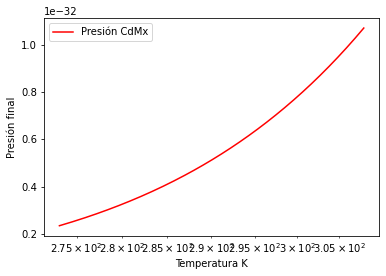

In [76]:
#ii)
#print(G1[1])
P1=G1[1]
print("La presión final de la CdMx a T=25°C es: ",P1[-1])
T=273.15
g, kb, m = 9.81, 1, 1
Temp=[]
PreFi=[] #presion final
Pres=lambda p,h: (-m*g/T*kb)*p
while(T<=308.15): #308.15
   # Pres=lambda p,h: (-m*g/T*kb)*p
    Temp.append(T)
    SB3=RK_4(Pres, 0, 2250.0, 1, 3000)
    P2=SB3[1]
    PF=P2[-1] #presión final a una T
    PreFi.append(PF)
    T=T+0.175    #Se suma 0.175 pues asi se cubren 200 puntos en el intervalo (0°c,35°c)
plot(Temp, PreFi,'r-', label='Presión CdMx')
xlabel('Temperatura K')
ylabel('Presión final')
xscale('log')
#yscale('log')
#title('Preción final dependiendo de la temperatura de la CdMx')
legend()
show()

De la grafica de la variación de presión de la CdMx y pico de Orizaba a T=25°C se observa que dependiendo de la altura la presión disminuye y a cierta altura h entre $(10^{2}, 10^{3})$ (En escala logaritmica) la velocidad de decrecimiento aumenta, lo que significa que la presión comienza a variar rapidamente mientras la altura aumenta. La grafica muestra un comportamiento tipo exponencial.

Por otra parte, en la segunda grafica, se observa que la presión final esta relacionada con la temperatura.
A mayor aumento en la temperatura, mayor sera el aumento de la presión final. La grafica muestra un comportamiento exponencial.

## Ecuaciones de segundo orden

### 2. El Movimiento planetario
Usando la ley de gravitación universal y la segunda ley de newton, gráfica la orbita de
la tierra y de otros dos planetas (los de tu preferencia).

Se tiene la ley de gravitación universal y newton
$$\begin{pmatrix}
\ddot{x}\\
\ddot{y}
\end{pmatrix}= \begin{pmatrix}
\frac{-GM}{r^{2}}\frac{x}{r}\\
\frac{-GM}{r^{2}}\frac{y}{r}
\end{pmatrix}=-GM \begin{pmatrix}
\frac{x}{(x^{2}+y^{2})^{3}}\\
\frac{y}{(x^{2}+y^{2})^{3}}
\end{pmatrix}$$
Por otra parte $\ddot{x}=\frac{dv_{x}}{dt}$ y $\ddot{y}=\frac{dv_{y}}{dt}$ por lo que 
$$\frac{dv_{x}}{dt}=-GM\frac{x}{(x^{2}+y^{2})^{3/2}}$$ y $$\frac{dv_{y}}{dt}=-GM\frac{y}{(x^{2}+y^{2})^{3/2}}$$

In [2]:
from scipy import constants as constantes
def mov_plane(r,t):
    x, y=r[0], r[1]
    vx, vy=r[2], r[3]
    G, M= constantes.gravitational_constant, 1.98e30
    b1=(-G*M*x)/(x**2 +y**2)**(3/2)
    b2=(-G*M*y)/(x**2 +y**2)**(3/2)
    B=array([b1,b2], float)
    r = array([vx, vy, B[0], B[1]])
    return r

In [10]:
def Euler2(f, r, t, h):
    r += h * f(r,t)

def RK22(f, r, t, h):
    k1 = f(r,t)
    k2 = f(r + 0.5*h*k1, t + 0.5*h)
    r += h*k2
    
def RK42(f, r, t, h):
    k1 = f(r,t)
    k2 = f(r + 0.5*h*k1, t + 0.5*h)
    k3 = f(r + 0.5*h*k2, t + 0.5*h)
    k4 = f(r + h*k3, t+h)
    r += (h/6) * (k1 + 2*k2 + 2*k3 + k4)

def EDO2_Matrix(f, to, tf, x1i, x2i, v1i, v2i, h, metodo): #Metodo para resolver un sistema de dos ecuaciones diferenciales de segundo grado
    lista_t = arange(to, tf, h)                            #Definimos el intervalo y la distancia entre cada punto del intervalo
    lista_x1 = []                                          #listas vacias para los valores x
    lista_v1 = []                                          # y
    lista_x2 = []                                          # dx
    lista_v2 = []                                          # dy
    r = array([x1i, x2i, v1i, v2i], float)                 #pedimos que sea un vector de tipo flotante
    for t in lista_t:                                      #en el ciclo for guardaremos los valores iniciales x, y, dx, dy antes de pasar por 
        lista_x1.append(r[0])                              #algun metodo de los puestos arriba y despues se vuelven a guardar los nuevos valores por cada 
        lista_x2.append(r[1])                              # recorrido t en la lista_t del for
        lista_v1.append(r[2])
        lista_v2.append(r[3])
        metodo(f, r, t, h)
    return lista_t, lista_x1, lista_x2, lista_v1, lista_v2  #nos regresa la lista con los valores a lo largo del intervalo de tiempo

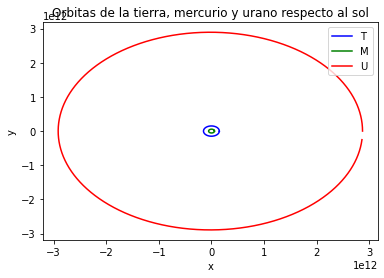

In [7]:
#Tierra
rt = 1.496e11       #radio tierra sol
vt = 29800          #vel tierra
tto = 0             #tiempo inicial
ttf = 365*24*3600   #1 año

#Mercurio
rm=5.791e10
vm=47000
ttom=0
ttfm= 88*24*3600

#Urano
ru=2.87e12
vu=6810
ttfu=30664*24*3600

N=1000
h=abs(ttf-tto) /N


ST = EDO2_Matrix(mov_plane, 0, ttf, rt, 0, 0, vt, h, RK42) #ti periodo en segundos vx y vy velocidades de traslacion del planeta
SM=EDO2_Matrix(mov_plane, 0, ttfm, rm, 0, 0, vm, h, RK42)
SU=EDO2_Matrix(mov_plane, 0, ttfu, ru, 0, 0, vu, h, RK42)
plot(ST[1], ST[2], 'b')
plot(SM[1],SM[2], 'g')
plot(SU[1],SU[2], 'r')
xlabel('x')
ylabel('y')
title('Orbitas de la tierra, mercurio y urano respecto al sol')
legend('TMU') #T=tierra, M=Mercurio, U=Urano
show()

### 3. Fuerza de arrastre en caída libre

La fuerza de arrastre FD que actúa sobre cierto objeto en caída libre, puede ser aproximada por:
$$F_{D}=a \nu ^{2}e^{-by}$$
donde $\nu$ es la velocidad del objeto, $y$ la altura, mientras que $a$ y $b$ son constantes que
dependen del objeto y del fluido.
El termino exponencial explica el cambio de la densidad del aire con la altura. La
ecuación diferencial que describe la caída del objeto es
$$m\ddot{y}=-mg+ F_{D}$$

(i) Encuentra el tiempo $t$ en que el objeto toca el suelo, para ello soluciona la ecuación
diferencial si $y(0) = 9000 m$ y $\dot{y}= 0$. Considera el valor de las siguientes constantes
$m = 114 kg$, $a = 7.45 kg/m$, $b = 10.53x10−5 m−1$, y $g = 9.8 m/s2$.

(ii) Encuentra el Encuentra el tiempo t en que el objeto toca el suelo, para un objeto
en caída libre sin fuerza de arrastre $m \ddot{y}= −mg$.

(iii) Haz una gráfica de las dos clases de movimientos, y realiza un análisis de la misma.

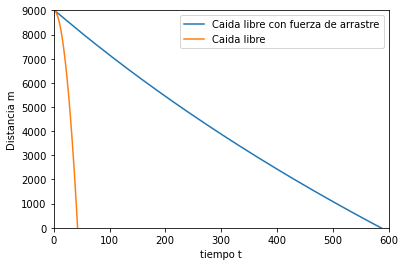

In [74]:
def F_arrastre(r,t):       #caida libre con la consideracion de la fuerza de arrastre 
    y=r[0]
    v=r[1]
    fy=v
    fv=-g+(a*v**2 *exp(-b*y))/m
    return array([fy,fv],float)
def F(r,t):               #caida libre sin fuerza de arrastre
    y=r[0]
    v=r[1]
    fy=v
    fv=-g
    return array([fy, fv],float)
def EDO2(f,to,tf,xi,vi,h,metodo): #f es la funcion, to el tiempo inicial, tf tiempo final, xi condicion inicial de la posición
    lista_t=arange(to,tf,h)         #vi es la condicion inicial sobre la derivada, h es la separación y metodo el metodo para resolver la ED
    lista_x=[]
    lista_v=[]                        #Se definen listas vacias para posteriormente llenarlas con forme aumente el for
    r = array([xi,vi],float)          #definimos el vector r con las condiciones iniciales
    for t in lista_t:                
        lista_x.append(r[0])            #con forme aumente lista_t se guarda en cada lista el valor de xi, vi a cada t nueva
        lista_v.append(r[1])
        metodo(f, r, t, h)              #A los metodos no se les puso un return porque se llaman dentro de la misma funcion EDO2
    return lista_t, lista_x, lista_v    #Nos regresa la lista de t, x, y x' una vez completado el for

#inciso iii)
xi=9000
vi=0
g=9.8
m=114
a, b=7.45, 10.53e-5
SFa4 = EDO2(F_arrastre, 0, 600, xi, vi, 0.001, RK42)
SF4 = EDO2(F, 0, 44, xi, vi, 0.001, RK42)
plot(SFa4[0], SFa4[1], label = 'Caida libre con fuerza de arrastre')
plot(SF4[0], SF4[1], label='Caida libre')
ylim([0,9000])
xlim([0,600])
xlabel('tiempo t')
ylabel('Distancia m')
legend()
show()


Por una parte la grafica de la caida libre (grafica naranja) nos muestra un comportamiento parabolico mientras que la grafica de la caida libre con la fuerza de arrastre (grafica azul) muestra una trayectoria de resistencia al viento con un comportamiento de tipo exponencial.
Notese la diferencia de tiempo entre la posicion final del objeto en caida libre y con fuerza de arrastre. se tiene aproximadamente una diferecia de 400s aproximadamente. 
Aunque ambos objetos tienen la mismas condiciones iniciales se observa que el comportamiento de la caida es completamente diferente.

In [73]:
#inciso i) y ii)

#Buscando el tiempo t en que la posicion x llega a 0

#valores para la la caida con fuerza de arrastre
posicion=SFa4[1]
tiempo=SFa4[0]
tiempoFa=[]
posicionFa=[]
t21=len(posicion)

#valores para la caida libre
posicion1=SF4[1]
tiempo1=SF4[0]
tiempoF=[]
posicionF=[]
t22=len(posicion1)
#print(posicion1)
for i in range(t21):
    if (posicion[i]<=0.0):
        #tiempo.pop(i)
        np.delete(tiempo, i)
    else:
        posicionFa.append(posicion[i])
        tiempoFa.append(tiempo[i])
for j in range(t22):
    if (posicion1[j]<=0.0):
        np.delete(tiempo1, j)
    else:
        posicionF.append(posicion1[j])
        tiempoF.append(tiempo1[j])
print("El tiempo en el que la particula llega al suelo es aproximadamente de: %s segundos"% (tiempoFa[-1]))
print("El tiempo en el que la particula llega al suelo en caida libre es aproximadamente %s segundos"% (tiempoF[-1]))

42.857 0.059999898961663356
El tiempo en el que la particula llega al suelo es aproximadamente de: 586.362 segundos
El tiempo en el que la particula llega al suelo en caida libre es aproximadamente 42.857 segundos


4. El bloque de hierro magnetizado de masa $m$ está unido a un resorte de rigidez $k$ y
longitud $L$. El bloque está en reposo en $x = L$ cuando un electroimán está encendido,
ejerciendo una fuerza de repulsión $F = c/x2$ en el bloque. La ecuación de movimiento resultante es
$$m \ddot{x}=\frac{c}{x^{2}}-k(x-L)$$
Determina la amplitud y el periodo, no olvides reportar el error numérico. Resuelve
usando el método numérico que prefieras.

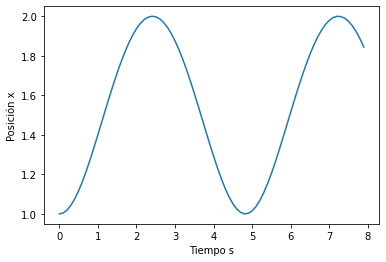

La amplitud es de:  [1.0]
El periodo es aproximadamente de :  4.8500000000000005


In [138]:
def RBHM(r,t):
    x=r[0]
    v=r[1]
    fx=v
    fv=(c/x**2-k*(x-L))/m
    return array([fx,fv], float)
m,L,k,c= 1,1,1,1
x=L
SRBHM=EDO2(RBHM,0,8,1,0,0.1,RK42) #solucionamos usanado Runge Kutta 4
plot(SRBHM[0],SRBHM[1])
xlabel('Tiempo s')
ylabel('Posición x')
show()

Amplitud=EDO2(RBHM,0,0.01,1,0,0.1,RK42) #la amplitud es de 1, evaluamos la ED en t=0 para obtener la amplitud
print("La amplitud es de: ", Amplitud[1])
L1=SRBHM[1]
L2=SRBHM[0]
L22=[]
#print(L1, L2)    intenté aplicar un ciclo for y condicionar que cuando L1[i]==1 imprimiera el valor del tiempo asi, mostraria el tiempo que le toma repetir el comportamiento y de ahi sacar el periodo pero no se repetian los valor de L1[i] por lo que no marcaba la igualdad mas que en el inicio
for i in range(len(L2)):
    if L1[i]<=1.009 and L2[i]>=4:
        #print(L2[i],L1[i])
        L22.append(L2[i])
#print(L22)
periodo=(L22[1]+L22[-1])/2
print("El periodo es aproximadamente de : ", periodo)